**In this project is to segment customers of a Banking institution to guard decision marketing strategies.**



Importing Libraries


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.simplefilter("ignore")


In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

Uploading dataset


In [0]:
data=pd.read_csv('bank_customer_data.csv')

Data Wrangling and Preprocessing


In [4]:
data.shape

(32127, 21)

In [5]:
data.describe()

,prev.sales,year.contact,length,central.interest.rate,employment.rate,price.index,age,staff_total,confidence.index,emails.month
count,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000
mean,0.070128,2.558253,516.631805,4.621477,1.619901,107.644027,40.016373,15500.546830,90.043128,0.675693
std,0.412068,2.897514,533.776657,1.801579,2.358772,2.056960,10.578683,218.750952,9.929431,0.702980
min,0.000000,0.000000,0.000000,-0.048000,-3.800000,99.214400,15.000000,14801.000000,61.720000,0.000000
25%,0.000000,1.000000,201.000000,2.574000,-1.100000,106.254400,32.000000,15306.000000,83.460000,0.000000
50%,0.000000,2.000000,355.000000,5.466000,3.150000,107.640000,38.000000,15586.000000,88.070000,1.000000
75%,0.000000,3.000000,634.000000,6.018500,3.500000,109.032000,47.000000,15674.000000,98.480000,1.000000
max,4.000000,55.000000,9480.000000,7.695000,3.800000,116.090800,94.000000,15820.000000,124.610000,8.000000


In [6]:
data.head()

,housing,job,day,qualification,month,location,online.banking,checking.account,prev.sales,year.contact,length,central.interest.rate,employment.rate,customer.satisfaction,price.index,credit.rating,age,staff_total,confidence.index,emails.month,y
0,no,Lawyer,tue,other,aug,Inner.city,inactive,yes,0,4,452,5.674,3.60,Satisfactory,106.1952,satisfactory,51,15689,106.02,0,no
1,no,Driver,thu,Higher.school.certificate,may,Inner.city,inactive,yes,0,3,129,1.378,-1.10,Satisfactory,107.5944,satisfactory,27,15315,76.23,1,no
2,no,Gardener,wed,Bachelour.degree,may,Inner.city,inactive,no,0,3,329,6.654,3.35,Satisfactory,102.5752,satisfactory,56,15589,100.28,1,no
3,yes,Driver,mon,other,may,Inner.city,inactive,no,0,1,272,2.321,-1.00,Satisfactory,105.8844,poor,34,15303,76.90,0,no
4,yes,Lawyer,tue,other,jun,Inner.city,inactive,no,0,3,513,5.379,3.50,Satisfactory,112.6620,satisfactory,56,15651,90.07,0,no


In [7]:
data.corr()

,prev.sales,year.contact,length,central.interest.rate,employment.rate,price.index,age,staff_total,confidence.index,emails.month
prev.sales,1.000000,-0.045695,0.041907,-0.246978,-0.234493,-0.008569,0.033884,-0.321022,0.072804,0.355966
year.contact,-0.045695,1.000000,-0.066836,0.122345,0.143201,0.022873,0.009432,0.134033,-0.006238,-0.056887
length,0.041907,-0.066836,1.000000,-0.028446,-0.028932,0.005162,0.002228,-0.043712,-0.007448,0.017477
central.interest.rate,-0.246978,0.122345,-0.028446,1.000000,0.932121,0.151389,0.015326,0.899571,0.261597,-0.304155
employment.rate,-0.234493,0.143201,-0.028932,0.932121,1.000000,0.178588,0.001566,0.896669,0.191760,-0.295362
price.index,-0.008569,0.022873,0.005162,0.151389,0.178588,1.000000,0.000272,0.118634,0.015600,-0.038130
age,0.033884,0.009432,0.002228,0.015326,0.001566,0.000272,1.000000,-0.015935,0.123691,0.020215
staff_total,-0.321022,0.134033,-0.043712,0.899571,0.896669,0.118634,-0.015935,1.000000,0.098634,-0.348932
confidence.index,0.072804,-0.006238,-0.007448,0.261597,0.191760,0.015600,0.123691,0.098634,1.000000,-0.038938
emails.month,0.355966,-0.056887,0.017477,-0.304155,-0.295362,-0.038130,0.020215,-0.348932,-0.038938,1.000000


In [8]:
data.dtypes

housing                   object
job                       object
day                       object
qualification             object
month                     object
location                  object
online.banking            object
checking.account          object
prev.sales                 int64
year.contact               int64
length                     int64
central.interest.rate    float64
employment.rate          float64
customer.satisfaction     object
price.index              float64
credit.rating             object
age                        int64
staff_total                int64
confidence.index         float64
emails.month               int64
y                         object
dtype: object

In [0]:
#Transforming Categorical features to numerical features
label=LabelEncoder()
data['housing']=label.fit_transform(data['housing'])
data['job']=label.fit_transform(data['job'])
data['day']=label.fit_transform(data['day'])
data['qualification']=label.fit_transform(data['qualification'])
data['month']=label.fit_transform(data['month'])
data['location']=label.fit_transform(data['location'])
data['online.banking']=label.fit_transform(data['online.banking'])
data['checking.account']=label.fit_transform(data['checking.account'])
data['customer.satisfaction']=label.fit_transform(data['customer.satisfaction'])
data['credit.rating']=label.fit_transform(data['credit.rating'])
data['y']=label.fit_transform(data['y'])

In [10]:
data.head(5)

,housing,job,day,qualification,month,location,online.banking,checking.account,prev.sales,year.contact,length,central.interest.rate,employment.rate,customer.satisfaction,price.index,credit.rating,age,staff_total,confidence.index,emails.month,y
0,0,6,3,6,1,0,1,1,0,4,452,5.674,3.60,2,106.1952,2,51,15689,106.02,0,0
1,0,3,2,1,6,0,1,1,0,3,129,1.378,-1.10,2,107.5944,2,27,15315,76.23,1,0
2,0,5,4,0,6,0,1,0,0,3,329,6.654,3.35,2,102.5752,2,56,15589,100.28,1,0
3,2,3,1,6,6,0,1,0,0,1,272,2.321,-1.00,2,105.8844,1,34,15303,76.90,0,0
4,2,6,3,6,4,0,1,0,0,3,513,5.379,3.50,2,112.6620,2,56,15651,90.07,0,0


In [11]:
data.describe()

,housing,job,day,qualification,month,location,online.banking,checking.account,prev.sales,year.contact,length,central.interest.rate,employment.rate,customer.satisfaction,price.index,credit.rating,age,staff_total,confidence.index,emails.month,y
count,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000,32127.000000
mean,1.068136,6.426401,1.998693,3.106733,4.235907,0.418122,0.869798,0.635291,0.070128,2.558253,516.631805,4.621477,1.619901,1.757743,107.644027,1.500202,40.016373,15500.546830,90.043128,0.675693,0.151648
std,0.985859,3.202419,1.394754,2.476566,2.320363,0.813231,0.400241,0.481356,0.412068,2.897514,533.776657,1.801579,2.358772,0.626698,2.056960,0.688568,10.578683,218.750952,9.929431,0.702980,0.358685
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.048000,-3.800000,0.000000,99.214400,0.000000,15.000000,14801.000000,61.720000,0.000000,0.000000
25%,0.000000,4.000000,1.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,201.000000,2.574000,-1.100000,2.000000,106.254400,1.000000,32.000000,15306.000000,83.460000,0.000000,0.000000
50%,2.000000,6.000000,2.000000,3.000000,4.000000,0.000000,1.000000,1.000000,0.000000,2.000000,355.000000,5.466000,3.150000,2.000000,107.640000,2.000000,38.000000,15586.000000,88.070000,1.000000,0.000000
75%,2.000000,9.000000,3.000000,6.000000,6.000000,0.000000,1.000000,1.000000,0.000000,3.000000,634.000000,6.018500,3.500000,2.000000,109.032000,2.000000,47.000000,15674.000000,98.480000,1.000000,0.000000
max,2.000000,11.000000,4.000000,7.000000,9.000000,2.000000,2.000000,1.000000,4.000000,55.000000,9480.000000,7.695000,3.800000,2.000000,116.090800,3.000000,94.000000,15820.000000,124.610000,8.000000,1.000000


In [12]:
data.dtypes

housing                    int64
job                        int64
day                        int64
qualification              int64
month                      int64
location                   int64
online.banking             int64
checking.account           int64
prev.sales                 int64
year.contact               int64
length                     int64
central.interest.rate    float64
employment.rate          float64
customer.satisfaction      int64
price.index              float64
credit.rating              int64
age                        int64
staff_total                int64
confidence.index         float64
emails.month               int64
y                          int64
dtype: object

In [13]:
data.corr()

,housing,job,day,qualification,month,location,online.banking,checking.account,prev.sales,year.contact,length,central.interest.rate,employment.rate,customer.satisfaction,price.index,credit.rating,age,staff_total,confidence.index,emails.month,y
housing,1.000000,-0.012259,0.004615,0.009082,-0.024036,-0.016239,-0.042046,0.080637,0.010382,-0.006429,-0.005138,-0.061516,-0.063056,-0.028601,-0.021485,-0.011965,-0.002020,-0.049095,-0.034379,0.018905,0.003701
job,-0.012259,1.000000,0.002097,-0.075529,0.069476,0.119835,-0.000567,-0.065987,-0.041862,0.001280,0.014566,0.019988,0.019229,0.017397,0.004373,0.102212,0.068983,0.027295,-0.070685,-0.025128,-0.038980
day,0.004615,0.002097,1.000000,-0.000266,0.021698,-0.008327,0.006331,0.013431,0.006821,-0.031815,0.018636,0.030844,0.025713,0.006653,-0.000974,-0.005931,-0.015823,0.022101,0.027148,0.007187,0.011223
qualification,0.009082,-0.075529,-0.000266,1.000000,-0.073922,-0.038403,-0.011071,0.066599,0.040766,-0.001116,-0.013017,-0.014914,-0.019589,0.002722,-0.010237,-0.020539,0.070635,-0.029401,0.095270,0.023244,0.039421
month,-0.024036,0.069476,0.021698,-0.073922,1.000000,-0.018524,0.000764,-0.246330,0.045040,-0.050993,0.002148,-0.105772,-0.168798,-0.105272,-0.008340,-0.001735,-0.021213,-0.209995,0.009393,0.073277,-0.002070
location,-0.016239,0.119835,-0.008327,-0.038403,-0.018524,1.000000,0.005643,-0.124593,-0.065396,0.028005,-0.009379,0.179638,0.194553,0.082345,0.038327,0.091931,0.154022,0.178828,0.024497,-0.057421,-0.080791
online.banking,-0.042046,-0.000567,0.006331,-0.011071,0.000764,0.005643,1.000000,-0.014311,-0.002955,-0.005578,-0.002992,0.000285,-0.001190,-0.001286,-0.007292,-0.001994,0.007017,-0.005075,0.009957,0.003034,0.006363
checking.account,0.080637,-0.065987,0.013431,0.066599,-0.246330,-0.124593,-0.014311,1.000000,0.097405,-0.074384,0.034159,-0.366023,-0.372670,-0.213236,-0.127786,-0.043588,-0.008473,-0.253613,-0.232289,0.147559,0.115899
prev.sales,0.010382,-0.041862,0.006821,0.040766,0.045040,-0.065396,-0.002955,0.097405,1.000000,-0.045695,0.041907,-0.246978,-0.234493,-0.215300,-0.008569,-0.015902,0.033884,-0.321022,0.072804,0.355966,0.230047
year.contact,-0.006429,0.001280,-0.031815,-0.001116,-0.050993,0.028005,-0.005578,-0.074384,-0.045695,1.000000,-0.066836,0.122345,0.143201,0.075011,0.022873,0.004070,0.009432,0.134033,-0.006238,-0.056887,-0.050431


In [15]:
data.head(5)

,housing,job,day,qualification,month,location,online.banking,checking.account,prev.sales,year.contact,length,central.interest.rate,employment.rate,customer.satisfaction,price.index,credit.rating,age,staff_total,confidence.index,emails.month,y
0,0,6,3,6,1,0,1,1,0,4,452,5.674,3.60,2,106.1952,2,51,15689,106.02,0,0
1,0,3,2,1,6,0,1,1,0,3,129,1.378,-1.10,2,107.5944,2,27,15315,76.23,1,0
2,0,5,4,0,6,0,1,0,0,3,329,6.654,3.35,2,102.5752,2,56,15589,100.28,1,0
3,2,3,1,6,6,0,1,0,0,1,272,2.321,-1.00,2,105.8844,1,34,15303,76.90,0,0
4,2,6,3,6,4,0,1,0,0,3,513,5.379,3.50,2,112.6620,2,56,15651,90.07,0,0


Correlation Plot

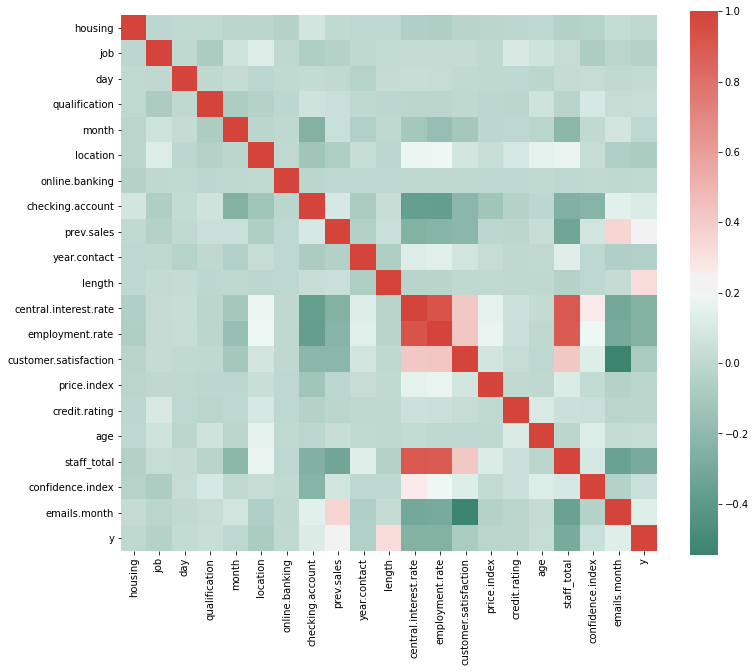

In [16]:
#Correlation Plot
f,ax=plt.subplots(figsize=(12,10))
corr=data.corr()
sns.heatmap(data.corr(),mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(520,14,as_cmap=True),square=True, ax=ax)

In [0]:
datasets=data[['age','length']]

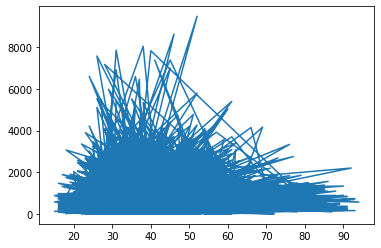

In [0]:
plt.plot(datasets["age"],datasets['length'])

Dendogram to Choose Clusters

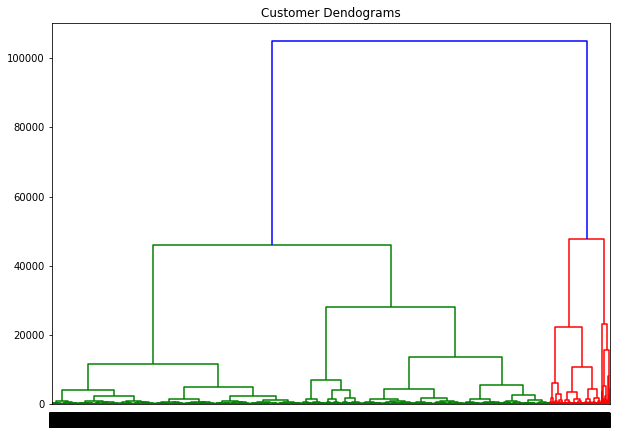

In [18]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(datasets, method='ward'))

In [22]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(datasets)

array([0, 3, 0, ..., 2, 3, 3])

Plot of Clusters

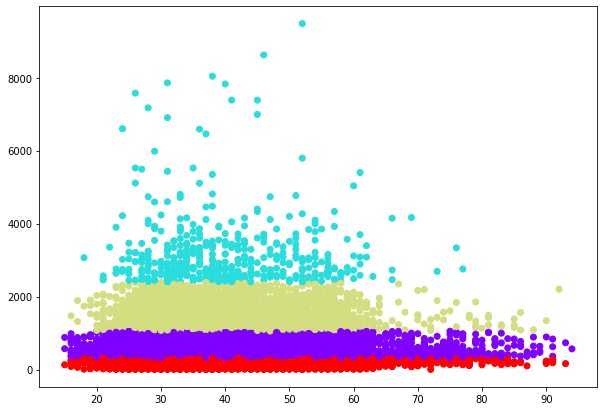

In [23]:
plt.figure(figsize=(10, 7))
plt.scatter(datasets['age'], datasets['length'], c=cluster.labels_, cmap='rainbow')